    I started my project by trying to answer how one could predict the price of a house in a certain city. I think thought about the various factors that could influence it such as location, furnishing, neighborhood features, amount of space in the home, etc. I then looked through Kaggle and came across this dataset with several csvs https://www.kaggle.com/ruchi798/housing-prices-in-metropolitan-areas-of-india?select=Kolkata.csv. I found it compelling because it had more features than any other dataset I could find. It happened to be the major cities in India and I decided to focus on Bangalore. 
    As I was going through the data I took note there were about 40 columns which seemed like a lot. There But some of them had missing data. Some categories seemed less useful than others like superstitions and some I would have liked to seen such as property taxes. It was also in binary. So I decided to bundle some of the feature that were similar and drop columns with little data. After this process I was confident I could use the remaining features to analyse how housing prices are determind in Bangalore. 


In [72]:
import os
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
cwd = os.getcwd()
print(cwd)

places = pd.read_csv("CleanBangalore.csv")
#Most of my variables are boolean. I am going to introduce variables that count the number of different features based on the major 4 categories
#funiture, fitness, appliances, and entertainment




C:\Users\Tom\Documents\GitHub


## Data Wrangling

I cleaned up my data by getting rid of some factors that could skew analysis based on missing data. I then
assessed how I could bundle some categories together to make larger, more useful ones. The four I came up with
were furniture, fitness, appliances, and entertainment. 
Knowling that in the US an apartment or house comes with appliances, it was interesting to identify obsevations in my dataset where the number of appliances was zero. This was one of the reasons why I combined these together. Regarding the furniture, I wanted to create a variable that was focusing on furnished vs unfurnished apartments and their differences. Unfortunately the number of funished apartments in the dataset was limited. 

I wanted to identify categories of apartments based on the luxury and I focused on some variables that could be categorized as luxury amenities. I split those into two categories fitness and entertainment. It was interesting to see that fitness was a major predictor on the price of the apartment.

In [73]:
places["Furniture"] = places["BED"] + places["Sofa"] + places["Wardrobe"] + places["DiningTable"]
places["Fitness"] = places["Gymnasium"] + places["SwimmingPool"] + places["JoggingTrack"] + places["SportsFacility"] + places["GolfCourse"]
places["Appliances"] = places["Refrigerator"] + places["Microwave"] + places["TV"] + places["WashingMachine"] + places["AC"]
places["Entertain"] = places["IndoorGames"] + places["ShoppingMall"] + places["Cafeteria"] + places["Children.splayarea"]

I looked for missing data, identified the variables and observations where this missing information were. There were many observations with missing data but there were enough observation in particular categories that allowed me to continue to the analysis.

In [74]:
#check if there are NAs
places.isnull().sum().sum()


0

In [75]:
#zero NAs
places['Wifi'].sum()
#check if there are houses with Wifi

0

In [76]:
places['Wardrobe'].sum()
#check if there are houses with Wardrobes

0

In [77]:
#drop Wifi and Wardrobe from data since there is no data
places.drop(columns=['Wifi', 'Wardrobe'])

places.head()

,Unnamed: 0,Price,Area,Location,Unnamed: 4,No..of.Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Furniture,Fitness,Appliances,Entertain
0,341,5599000,1120,Amruthahalli,Central,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,304,7837000,1866,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,...,1,0,0,0,0,0,0,5,0,3
2,305,9834000,2235,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,...,1,0,0,0,0,0,0,5,0,3
3,306,8298999,1976,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,...,1,0,0,0,0,0,0,5,0,3
4,307,8728000,2182,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,...,1,0,0,0,0,0,0,5,0,3


Still cleaning up the data as some of the column headers were inappropriate or vague.

In [78]:
#Here we are fixed the column names, especially the unique ID, Region, and bedrooms
columns = places.columns
print(columns)
places.columns = ['UID', 'Price', 'Area', 'Location', 'Region',
       'Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', 'X24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children.splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator', 'Furniture', 'Fitness', 'Appliances', 'Entertain']

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'Unnamed: 4',
       'No..of.Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', 'X24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children.splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator', 'Furniture', 'Fitness', 'Appliances', 'Entertain'],
      dtype='object')


## Initial descriptive analysis
I run the summary of descriptive analytics for each one of the variables. I reviewed the results and identified and initial subset of variables to include in my research. In addition I reviewed the correlations between variables to see if there is multicollinearity in my data before I run the regression.

In [79]:
print(places.describe().reset_index())

   index          UID         Price         Area     Bedrooms       Resale  \
0  count  1856.000000  1.856000e+03  1856.000000  1856.000000  1856.000000   
1   mean   968.481142  9.880561e+06  1508.585129     2.522091     0.092134   
2    std   562.332322  1.321882e+07   776.867104     0.680532     0.289292   
3    min     1.000000  2.096000e+06   525.000000     1.000000     0.000000   
4    25%   490.750000  4.897500e+06  1139.000000     2.000000     0.000000   
5    50%   966.500000  6.761000e+06  1307.500000     2.000000     0.000000   
6    75%  1442.250000  9.567250e+06  1590.000000     3.000000     0.000000   
7    max  1951.000000  2.027000e+08  9900.000000     5.000000     1.000000   

   MaintenanceStaff    Gymnasium  SwimmingPool  LandscapedGardens  ...  \
0       1856.000000  1856.000000   1856.000000        1856.000000  ...   
1          0.123922     0.920259      0.835668           0.678341  ...   
2          0.329582     0.270965      0.370676           0.467239  ...   
3

In [80]:
places.corr()

,UID,Price,Area,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Furniture,Fitness,Appliances,Entertain
UID,1.000000,0.064850,0.063071,0.051480,0.212599,-0.000520,0.088414,0.055945,-0.058220,-0.038571,...,-0.007931,0.057311,0.057311,0.057311,NaN,0.057311,0.058585,0.123987,0.057954,0.057296
Price,0.064850,1.000000,0.904116,0.529604,-0.083060,0.011691,0.080747,0.149025,-0.015412,0.148941,...,0.082279,0.131400,0.131400,0.131400,NaN,0.131400,0.132249,0.212432,0.131750,0.084318
Area,0.063071,0.904116,1.000000,0.703648,-0.057367,-0.011042,0.095665,0.176819,0.069409,0.197000,...,0.128294,0.149772,0.149772,0.149772,NaN,0.149772,0.151318,0.258892,0.150501,0.104897
Bedrooms,0.051480,0.529604,0.703648,1.000000,-0.036357,-0.005001,0.161577,0.239856,0.123234,0.181781,...,0.077818,0.128101,0.128101,0.128101,NaN,0.128101,0.129221,0.272652,0.129264,0.116312
Resale,0.212599,-0.083060,-0.057367,-0.036357,1.000000,-0.040656,0.052512,-0.029657,0.047874,0.041776,...,-0.050555,-0.114466,-0.114466,-0.114466,NaN,-0.114466,-0.114962,0.126538,-0.115000,-0.025774
MaintenanceStaff,-0.000520,0.011691,-0.011042,-0.005001,-0.040656,1.000000,0.110711,0.109417,0.220479,0.228132,...,-0.000489,0.081110,0.081110,0.081110,NaN,0.081110,0.080479,0.234246,0.081497,0.309900
Gymnasium,0.088414,0.080747,0.095665,0.161577,0.052512,0.110711,1.000000,0.475957,0.325285,0.373575,...,0.056078,0.074834,0.074834,0.074834,NaN,0.074834,0.075299,0.672130,0.075324,0.456216
SwimmingPool,0.055945,0.149025,0.176819,0.239856,-0.029657,0.109417,0.475957,1.000000,0.441658,0.457921,...,0.084480,0.136364,0.136364,0.136364,NaN,0.136364,0.137059,0.766723,0.137105,0.544429
LandscapedGardens,-0.058220,-0.015412,0.069409,0.123234,0.047874,0.220479,0.325285,0.441658,1.000000,0.622265,...,0.062166,0.053473,0.053473,0.053473,NaN,0.053473,0.051092,0.519650,0.052506,0.453191
JoggingTrack,-0.038571,0.148941,0.197000,0.181781,0.041776,0.228132,0.373575,0.457921,0.622265,1.000000,...,0.103524,0.024482,0.024482,0.024482,NaN,0.024482,0.021946,0.692734,0.023387,0.537071


This is a one way anova test. The categorical variable is the Region and I'm studying the effect of how the 'neighborhood' has on  the  price of the housing.
The results show me that there is a region that has average house price that is different than the rest of the regions because the p value is so small.

In [81]:
import scipy.stats as stats

stats.f_oneway(places['Price'][places['Region'] == 'Central'],
               places['Price'][places['Region'] == 'West'],
               places['Price'][places['Region'] == 'Southeast'],
               places['Price'][places['Region'] == 'East'],
               places['Price'][places['Region'] == 'Northeast'],
               places['Price'][places['Region'] == 'North'],
               places['Price'][places['Region'] == 'South'])


F_onewayResult(statistic=18.489207578925882, pvalue=5.743649647901988e-21)

This is a summary of descriptive statistics for price by region such as average price and standard deviation and percentiles by region. I broke the regions down based on the concentration of neighhood groupings. (Central, East, North, Northeast, South, Southeast, and West).
We can clearly see that the Central region is the most expensive with an average prices almost double that of the other regions. The number of houses in that regions was 505 that made it the 2nd largest after the South regions, that was actually a region with a low average price. The Central region has also the highest standard deviation that tells me that there are many different types of housing in that area and both ends of the prices. The maximun price in Central is 4 times the maximun price of the next regions which is South.

In [82]:

print(places['Price'].groupby(places['Region']).describe().reset_index())

      Region  count          mean           std        min        25%  \
0    Central  505.0  1.478950e+07  2.261382e+07  2096000.0  5559000.0   
1       East  175.0  8.738960e+06  6.979373e+06  2814000.0  4718500.0   
2      North  186.0  1.014567e+07  5.945566e+06  4866000.0  6959750.0   
3  Northeast   31.0  5.913710e+06  2.801731e+06  3372999.0  3856499.5   
4      South  620.0  7.859268e+06  6.051693e+06  2157000.0  4515750.0   
5  Southeast  142.0  8.061746e+06  8.143323e+06  2436000.0  3365250.0   
6       West  197.0  6.357218e+06  1.997640e+06  3800000.0  5089000.0   

         50%         75%          max  
0  7423000.0  13899999.0  202700000.0  
1  6221000.0   8954000.0   37500000.0  
2  8686500.0  10675000.0   44900000.0  
3  4800000.0   6999000.0   14800000.0  
4  6648000.0   8749000.0   69000000.0  
5  5184000.0  10200750.0   45700000.0  
6  5600000.0   7252000.0   13600000.0  


The results of the one way anova test showed that there are significant differences in the average price by region.
Now I perform a Tukey HSD test to help identify which regions exhibit different average prices assuming equal variances.

In [83]:
 
tukey = pairwise_tukeyhsd(places['Price'],
                          places['Region']
                          )
print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
  group1    group2     meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------------
  Central      East -6050540.9573  0.001  -9380070.8469 -2721011.0676   True
  Central     North -4643834.3051  0.001  -7899426.7917 -1388241.8184   True
  Central Northeast -8875791.3481 0.0037 -15899217.7185 -1852364.9776   True
  Central     South -6930233.2545  0.001  -9205476.8598 -4654989.6492   True
  Central Southeast -6727754.4991  0.001 -10333171.1002 -3122337.8981   True
  Central      West -8432282.6749  0.001 -11620757.0347 -5243808.3151   True
     East     North  1406706.6522    0.9  -2590635.0974  5404048.4019  False
     East Northeast -2825250.3908    0.9 -10221761.5011  4571260.7195  False
     East     South  -879692.2972    0.9  -4128783.2605   2369398.666  False
     East Southeast  -677213.5419    0.9  -4964274.0139  3609846.9302  False

Here is a graph of the Tukey results.
The graph shows us that the difference in average price is small but higher cost in the Central in comparision with every other region.The East, Southeast, South, and West regions have similar averages and ranges of prices. North region has slightly higher prices. Northeast has a big range. While Central is not similar to any of the others with the mean price being much higher than all the others.


C:\Users\Tom\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


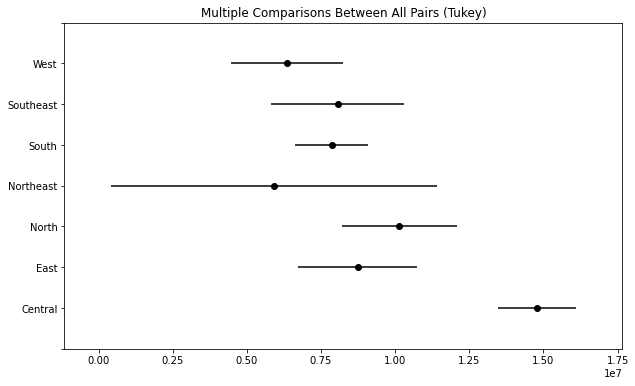

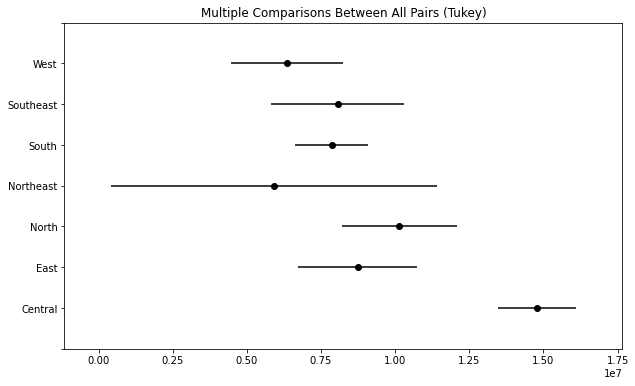

In [84]:

#Why does it make 2 graphs?
placesdata = MultiComparison(places['Price'], places['Region'])
results = placesdata.tukeyhsd() 
results.plot_simultaneous()


## Anova Table
In continuation of the *one way anova test*, here is the table of the sum of squares. The f test gives us a test statistic of 18.5 and a p value of 5.74x10^-21 that is caused because of the discrepencies between the central region and the rest of Bangalore as we reviewed in the above graph. 

In [85]:
#one way anova by region
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ C(Region)', data=places).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Region),1.834667e+16,6.0,18.489208,5.743650e-21
Residual,3.057910e+17,1849.0,NaN,NaN


## Regression

I'm running a normality plot on the prices to review the validity of regression.

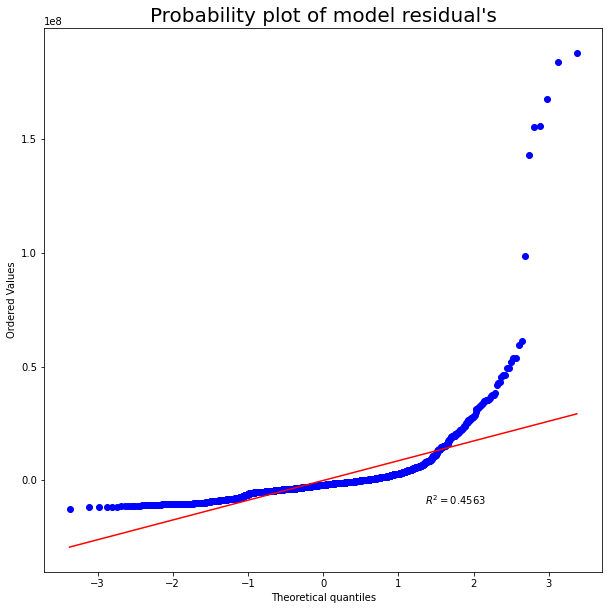

In [86]:
#run regression and looking at the normality plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

## Levene Test

Reviewing the variances of the different regions and we can see that the central region again is different than all the others. 

In [87]:
#Ran levene test
stats.levene(places['Price'][places['Region'] == 'Central'],
               places['Price'][places['Region'] == 'West'],
               places['Price'][places['Region'] == 'Southeast'],
               places['Price'][places['Region'] == 'East'],
               places['Price'][places['Region'] == 'Northeast'],
               places['Price'][places['Region'] == 'North'],
               places['Price'][places['Region'] == 'South'])

LeveneResult(statistic=16.164134399434975, pvalue=3.3034286802915356e-18)

## Data Visualization

The box plot below shows how extremely high the prices in the Central region are compared to everywhere else even though median prices seem relatively stable.

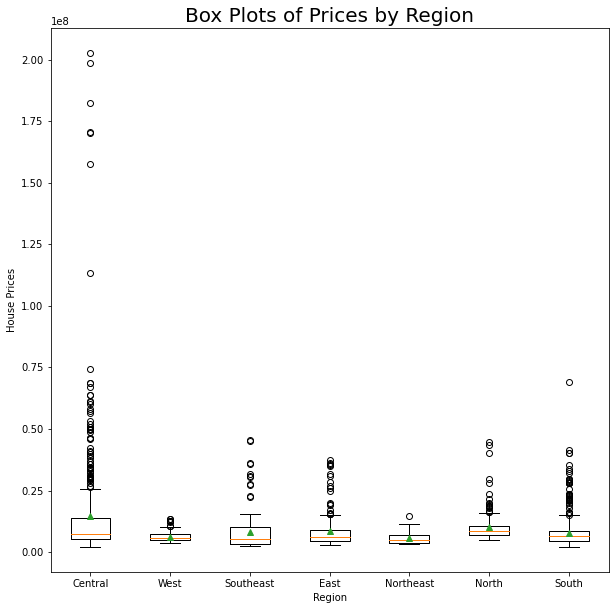

In [88]:
#Box plots of prices by region
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plots of Prices by Region", fontsize= 20)
ax.set

data = [  places['Price'][places['Region'] == 'Central'],
               places['Price'][places['Region'] == 'West'],
               places['Price'][places['Region'] == 'Southeast'],
               places['Price'][places['Region'] == 'East'],
               places['Price'][places['Region'] == 'Northeast'],
               places['Price'][places['Region'] == 'North'],
               places['Price'][places['Region'] == 'South']]

ax.boxplot(data,
           labels= ['Central','West', 'Southeast', 'East', 'Northeast', 'North', 'South'],
           showmeans= True)

plt.xlabel("Region")
plt.ylabel("House Prices")

plt.show()

Next I wanted to see how the number Entertainment features available was spread through the regions. It appears the Northeast has the most by far followed by North and Southeast.

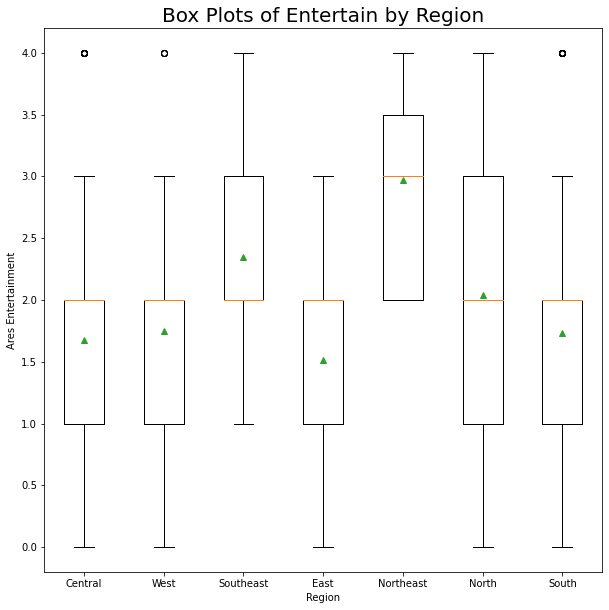

In [89]:
#box plots of number of entertainment sites per region
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plots of Entertain by Region", fontsize= 20)
ax.set

data = [  places['Entertain'][places['Region'] == 'Central'],
               places['Entertain'][places['Region'] == 'West'],
               places['Entertain'][places['Region'] == 'Southeast'],
               places['Entertain'][places['Region'] == 'East'],
               places['Entertain'][places['Region'] == 'Northeast'],
               places['Entertain'][places['Region'] == 'North'],
               places['Entertain'][places['Region'] == 'South']]

ax.boxplot(data,
           labels= ['Central','West', 'Southeast', 'East', 'Northeast', 'North', 'South'],
           showmeans= True)

plt.xlabel("Region")
plt.ylabel("Ares Entertainment")

plt.show()

Now I'm comparing the housing sizes and it appears once again the Central is dominating followed by Southeast and North. This is making me wonder if the Northeast is more of a "college town" like atmosposhere with very small housing but lots of entertainment near by.

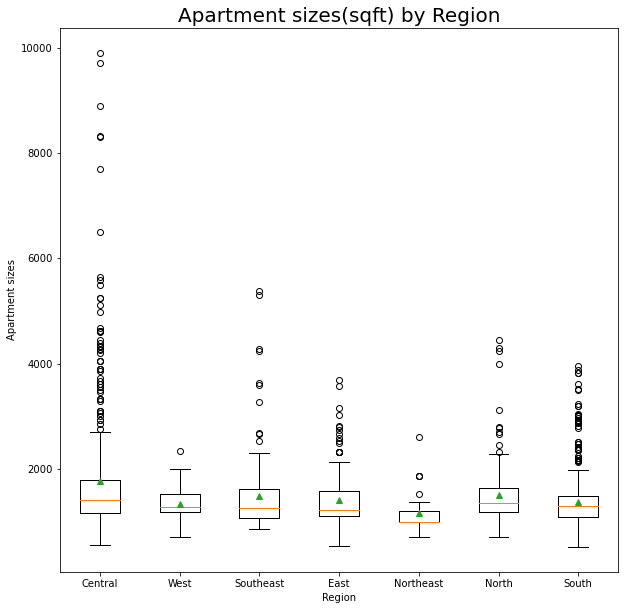

In [90]:
#box plots of sqft of area by region
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Apartment sizes(sqft) by Region", fontsize= 20)
ax.set

data = [  places['Area'][places['Region'] == 'Central'],
               places['Area'][places['Region'] == 'West'],
               places['Area'][places['Region'] == 'Southeast'],
               places['Area'][places['Region'] == 'East'],
               places['Area'][places['Region'] == 'Northeast'],
               places['Area'][places['Region'] == 'North'],
               places['Area'][places['Region'] == 'South']]

ax.boxplot(data,
           labels= ['Central','West', 'Southeast', 'East', 'Northeast', 'North', 'South'],
           showmeans= True)

plt.xlabel("Region")
plt.ylabel("Apartment sizes")

plt.show()

## Linear Regression Model

In [91]:
#Run a complete regression model of all variables
import statsmodels.formula.api as smf
#smf.ols(Price~Area+Region+No..of.Bedrooms+Fitness+Appliances+Furniture+RainWaterHarvesting+School+VaastuCompliant+Intercom+LiftAvailable+ShoppingMall+ATM+PowerBackup+MultipurposeRoom+CarParking+LandscapedGardens,
        #data = places).fit()
model = smf.ols("Price~Area+Region+Bedrooms+Fitness+Appliances+Furniture+RainWaterHarvesting+School+VaastuCompliant+Intercom+LiftAvailable+ShoppingMall+ATM+PowerBackup+MultipurposeRoom+CarParking+LandscapedGardens",
        data = places).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     517.9
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:41:13   Log-Likelihood:                -31232.
No. Observations:                1856   AIC:                         6.251e+04
Df Residuals:                    1833   BIC:                         6.264e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -7.26e+06   6.68e+05    -10.860      0.000   -8.57e+06   -5.95e+06
Region[T.East]      -1.213e+06   4.57e+05     -2.652      0.008   -2.11e+06   -3.16e+05
Region[T.North]      8.856e+05   4.56e+05      1.944      0.052   -7819.952    1.78e+06
Region[T.Northeast] -8.932e+04   9.97e+05     -0.090      0.929   -2.04e+06    1.87e+06
Region[T.South]     -9.045e+05   3.16e+05     -2.867      0.004   -1.52e+06   -2.86e+05
Region[T.Southeast] -1.182e+06   5.02e+05     -2.357      0.019   -2.17e+06   -1.99e+05
Region[T.West]       1.933e+05   5.19e+05      0.372      0.710   -8.24e+05    1.21e+06
Area                 1.744e+04    218.881     79.679      0.000     1.7e+04    1.79e+04
Bedrooms             -3.87e+06   2.43e+05    -15.948      0.000   -4.35e+06   -3.39e+06
Fitness              5.621e+05   1.37e+05      4.088      0.000    2.92e+05    8.32e+05
Appliances           2.781e+06   1.93e+06      1.444      0.149   -9.96e+05    6.56e+06
Furniture           -4.711e+06   3.21e+06     -1.468      0.142    -1.1e+07    1.58e+06
RainWaterHarvesting  2.551e+06   3.22e+05      7.913      0.000    1.92e+06    3.18e+06
School              -3.151e+06   5.21e+05     -6.052      0.000   -4.17e+06   -2.13e+06
VaastuCompliant     -1.088e+06      3e+05     -3.626      0.000   -1.68e+06   -4.99e+05
Intercom              1.04e+06   3.29e+05      3.163      0.002    3.95e+05    1.68e+06
LiftAvailable       -2.344e+06    3.9e+05     -6.012      0.000   -3.11e+06   -1.58e+06
ShoppingMall         3.095e+06   5.45e+05      5.680      0.000    2.03e+06    4.16e+06
ATM                 -1.676e+06   4.68e+05     -3.579      0.000   -2.59e+06   -7.58e+05
PowerBackup          2.312e+06   5.26e+05      4.395      0.000    1.28e+06    3.34e+06
MultipurposeRoom    -4.551e+05   3.07e+05     -1.482      0.138   -1.06e+06    1.47e+05
CarParking           8.384e+05   2.88e+05      2.908      0.004    2.73e+05     1.4e+06
LandscapedGardens   -4.113e+06   3.32e+05    -12.389      0.000   -4.76e+06   -3.46e+06
==============================================================================
Omnibus:                     1649.210   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146093.125
Skew:                           3.743   Prob(JB):                         0.00
Kurtosis:                      45.815   Cond. No.                     5.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By reviewing the previous model created with multiple regression, I dropped all the variables with high P values. The improved model that I created shows below and it is my final model. The p value of the overall model is small and ensures that the linear model is appropriate, all the coefficients of the model are largers so we don't have any unwanted effects. The R squared of the model is 86% and given that the model is not overfitted this R squared is optimal. 

In [92]:
#Final model. Low F statistic. High Rsquared 86%. All P values are small. All coefficients are large
model2 = smf.ols("Price~Area+Region+Bedrooms+Fitness+RainWaterHarvesting+School+VaastuCompliant+Intercom+LiftAvailable+ShoppingMall+ATM+PowerBackup+CarParking+LandscapedGardens",
        data = places).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     598.9
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:41:14   Log-Likelihood:                -31235.
No. Observations:                1856   AIC:                         6.251e+04
Df Residuals:                    1836   BIC:                         6.262e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7.357e+06   6.57e+05    -11.191      0.000   -8.65e+06   -6.07e+06
Region[T.East]      -1.205e+06   4.57e+05     -2.636      0.008    -2.1e+06   -3.08e+05
Region[T.North]      9.699e+05   4.53e+05      2.141      0.032    8.16e+04    1.86e+06
Region[T.Northeast] -3.448e+05   9.81e+05     -0.352      0.725   -2.27e+06    1.58e+06
Region[T.South]     -8.826e+05   3.15e+05     -2.799      0.005    -1.5e+06   -2.64e+05
Region[T.Southeast]  -1.14e+06   4.98e+05     -2.287      0.022   -2.12e+06   -1.62e+05
Region[T.West]       2.195e+05   5.17e+05      0.425      0.671   -7.94e+05    1.23e+06
Area                 1.744e+04    217.907     80.055      0.000     1.7e+04    1.79e+04
Bedrooms            -3.866e+06   2.43e+05    -15.930      0.000   -4.34e+06   -3.39e+06
Fitness               5.08e+05   1.32e+05      3.845      0.000    2.49e+05    7.67e+05
RainWaterHarvesting  2.473e+06   3.13e+05      7.892      0.000    1.86e+06    3.09e+06
School              -3.196e+06    5.2e+05     -6.141      0.000   -4.22e+06   -2.18e+06
VaastuCompliant     -1.184e+06   2.89e+05     -4.102      0.000   -1.75e+06   -6.18e+05
Intercom              1.12e+06   3.21e+05      3.493      0.000    4.91e+05    1.75e+06
LiftAvailable       -2.315e+06   3.84e+05     -6.023      0.000   -3.07e+06   -1.56e+06
ShoppingMall         3.115e+06   5.44e+05      5.724      0.000    2.05e+06    4.18e+06
ATM                 -1.662e+06   4.68e+05     -3.551      0.000   -2.58e+06   -7.44e+05
PowerBackup          2.319e+06   5.26e+05      4.408      0.000    1.29e+06    3.35e+06
CarParking            7.74e+05   2.86e+05      2.706      0.007    2.13e+05    1.33e+06
LandscapedGardens   -4.152e+06    3.3e+05    -12.589      0.000    -4.8e+06   -3.51e+06
==============================================================================
Omnibus:                     1656.452   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147737.611
Skew:                           3.768   Prob(JB):                         0.00
Kurtosis:                      46.053   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here I again want to look at descriptive statistics for the major predictors.

In [93]:

places[["Area", "Bedrooms", "Fitness"]].describe()

,Area,Bedrooms,Fitness
count,1856.000000,1856.000000,1856.000000
mean,1508.585129,2.522091,3.014009
std,776.867104,0.680532,1.157569
min,525.000000,1.000000,0.000000
25%,1139.000000,2.000000,3.000000
50%,1307.500000,2.000000,3.000000
75%,1590.000000,3.000000,4.000000
max,9900.000000,5.000000,5.000000


The following histograms are to get an idea of the distrubution of fitness centers, area, and number of bedrooms in the dataset.

(array([108.,   0., 105.,   0., 230.,   0., 660.,   0., 716.,  37.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

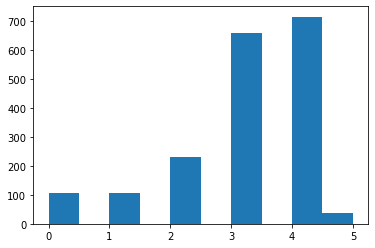

In [94]:
plt.hist(places["Fitness"])

(array([1.2e+03, 5.2e+02, 7.2e+01, 3.3e+01, 1.6e+01, 7.0e+00, 1.0e+00,
        1.0e+00, 3.0e+00, 2.0e+00]),
 array([ 525. , 1462.5, 2400. , 3337.5, 4275. , 5212.5, 6150. , 7087.5,
        8025. , 8962.5, 9900. ]),
 <BarContainer object of 10 artists>)

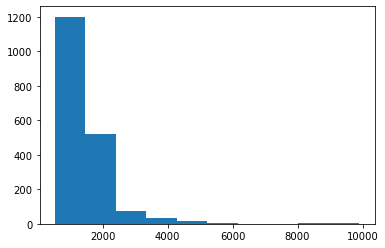

In [95]:
plt.hist(places["Area"])

(array([ 71.,   0., 862.,   0.,   0., 816.,   0.,  97.,   0.,  10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

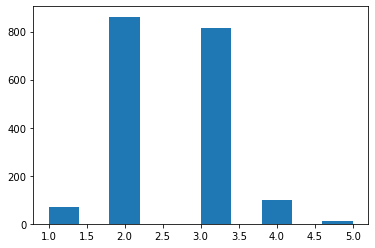

In [96]:
plt.hist(places["Bedrooms"])

In [97]:
places_small = places[["Price", "Area", "Fitness", "Bedrooms"]]
places_small.head()

,Price,Area,Fitness,Bedrooms
0,5599000,1120,0,2
1,7837000,1866,5,3
2,9834000,2235,5,3
3,8298999,1976,5,3
4,8728000,2182,5,3


## Zooming into the final model

Focusing only on the variables that are predictors for the prices I further reviewed their correlations I created a heat map and correlation matrix.

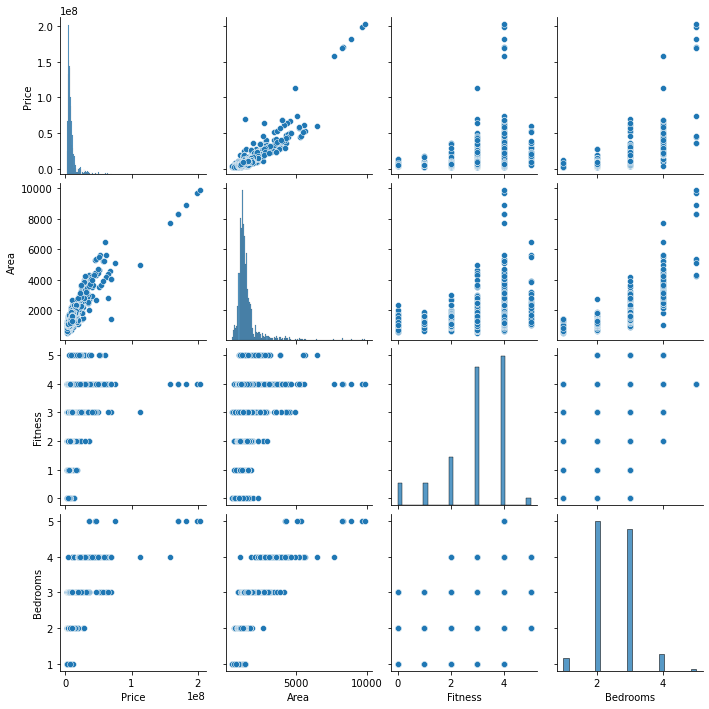

In [98]:
sns.pairplot(places_small)

(array([ 27.,  79., 127., 189., 202., 147., 160., 149., 116.,  93.,  89.,
         55.,  36.,  52.,  39.,  26.,  11.,  28.,  13.,  13.,  15.,   5.,
          4.,   7.,   4.,   6.,  12.,   3.,   8.,   6.,   6.,   9.,   8.,
          1.,   4.,   6.,   2.,   3.,   5.,   5.,   3.,   7.,   3.,   3.,
          4.,   0.,   2.,   5.,   2.,   3.,   4.,   2.,   2.,   0.,   1.,
          1.,   2.,   3.,   1.,   1.,   1.,   1.,   0.,   0.,   2.,   2.,
          2.,   0.,   0.,   1.,   0.,   4.,   1.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,
          2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

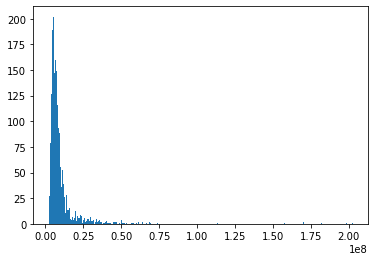

In [101]:
#The prices are distorted because of some apartments in the Central regions. May want to review the data to increase the number of bins appropriately
plt.hist(places["Price"], bins=300)

Based on heatmap it appears that the number of bedrooms and total area within the housing are the most important factors in the pricing. The number of bedrooms has a moderate impact. The number of fitness centers have almost no impact.

<AxesSubplot:>

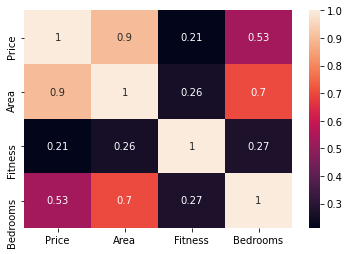

In [102]:
sns.heatmap(places_small.corr(), annot=True)

## Conclusion

    I started with lots of data and some of it was messy. But after cleaning it up a bit and performing the exploritory data analysis I was able to see strong trends. One is particular was how much more expensive it is to be in the central region compared to everywhere else. I can get a sense of income levels and what types of areas these are but not totally conclusive. There is more work I can do to find that out. But housing prices are strongly tied to the size of a home and the area it's located. There are several other factors such as number of bedrooms that have a moderat impact and others like fitness centers in the area that have almost no impact. Also some area have a much higher degree of variance in prices than others.

At this point I'm preparing the data and especially the categorical values for a logistic regression. I'm going to use the dummy method to introduce binary artificial valriables for each one of our categorical variables.

In [103]:
dummies = pd.get_dummies(places["Region"])
dummies.head()

,Central,East,North,Northeast,South,Southeast,West
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [104]:
dummies = pd.get_dummies(places["Location"])
dummies.head()

,Amruthahalli,Anagalapura Near Hennur Main Road,Anekal City,Anjanapura,Attibele,Avalahalli Off Sarjapur Road,BTM Layout,Badamanavarthekaval,Banashankari,Banaswadi,...,Talaghattapura,Thanisandra,Uttarahalli,Uttarahalli Hobli,Varthur,Vidyaranyapura,Whitefield,Whitefield Hope Farm Junction,Yelahanka,Yerthiganahalli
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
dummies = pd.get_dummies(places["Resale"])
dummies.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


We prepare to run a logistric regression. Our response variable is the region. We are going to develope a model based on the data received. It will predict the region that the property lays. 

In [109]:
places1 = places.drop(['UID'], axis=1)
places1.head()

,Price,Area,Location,Region,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Furniture,Fitness,Appliances,Entertain
0,5599000,1120,Amruthahalli,Central,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7837000,1866,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,1,...,1,0,0,0,0,0,0,5,0,3
2,9834000,2235,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,1,...,1,0,0,0,0,0,0,5,0,3
3,8298999,1976,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,1,...,1,0,0,0,0,0,0,5,0,3
4,8728000,2182,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,1,...,1,0,0,0,0,0,0,5,0,3


In [110]:
from sklearn.model_selection import train_test_split

X = pd.concat([places1._get_numeric_data(),dummies],axis=1)
y = places1.Region
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [111]:
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [112]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [113]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.935
Random Forest: f1-score=0.935


In [114]:
class_names=['North', 'East', 'South', 'West', 'Northeast', 'Southeast', 'Central']

Confusion matrix, without normalization
[[ 85   1   0   0   6   0   1]
 [  1  33   2   0   2   0   0]
 [  3   0  29   0   0   0   0]
 [  0   0   0   5   0   0   0]
 [  2   1   0   0 120   0   1]
 [  0   0   0   0   0  28   0]
 [  1   0   0   0   3   0  48]]
Normalized confusion matrix
[[0.91 0.01 0.   0.   0.06 0.   0.01]
 [0.03 0.87 0.05 0.   0.05 0.   0.  ]
 [0.09 0.   0.91 0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.02 0.01 0.   0.   0.97 0.   0.01]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.02 0.   0.   0.   0.06 0.   0.92]]


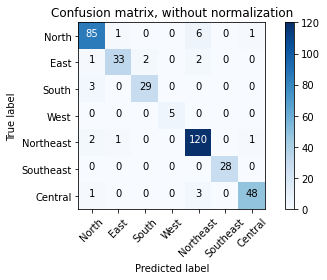

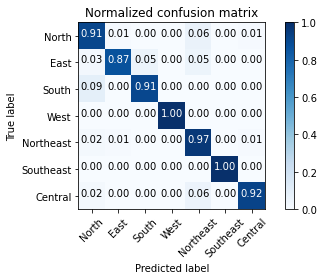

In [115]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

30


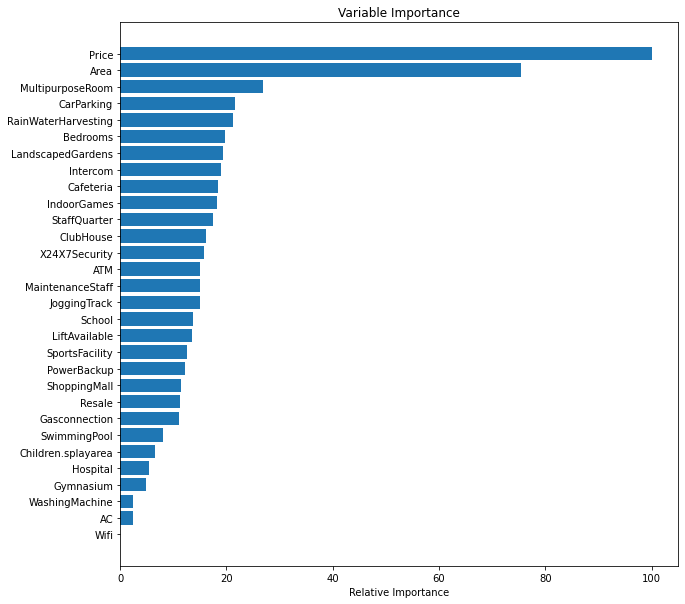

In [116]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

I'm going to run an OLS, a linear regression model with gradient boosting. The model will learn to predict prices based on the most important variables. Initially it runs with the prices of all the properties. The learned model gave me standard outliers in our predictions. In order to make the model more accurate and not dependant on outliers I reviewed the prices and identified 117 extreme outliers. This was less than 6% of the total observations. I decided to drop the outliers from the initial model and run the learning without them.

In [41]:
temp = places['Price']
print(temp)
temp.sort_values()

0        5599000
1        7837000
2        9834000
3        8298999
4        8728000
          ...   
1851    10600000
1852     9200000
1853    10100000
1854    10300000
1855     9799000
Name: Price, Length: 1856, dtype: int64


45       2096000
201      2157000
511      2253000
523      2254000
522      2254000
         ...    
700    170000000
687    170600000
688    182300000
697    198600000
699    202700000
Name: Price, Length: 1856, dtype: int64

In [42]:
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4669750.0


In [43]:
sum((temp<(Q1 - 3 * IQR))|(temp>(Q3 + 3 * IQR)))
threshold  = Q3 + 3 * IQR
print(threshold)

23576500.0


<AxesSubplot:xlabel='Price'>

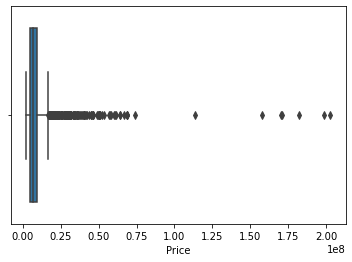

In [44]:
import seaborn as sns
sns.boxplot(x=temp)

In [47]:
placesClean = places[places['Price'] < threshold]
placesClean.head()

,UID,Price,Area,Location,Region,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Furniture,Fitness,Appliances,Entertain
0,341,5599000,1120,Amruthahalli,Central,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,304,7837000,1866,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,...,1,0,0,0,0,0,0,5,0,3
2,305,9834000,2235,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,...,1,0,0,0,0,0,0,5,0,3
3,306,8298999,1976,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,...,1,0,0,0,0,0,0,5,0,3
4,307,8728000,2182,Anagalapura Near Hennur Main Road,Central,3,0,0,1,1,...,1,0,0,0,0,0,0,5,0,3


In [53]:
dummies = pd.get_dummies(placesClean["Region"])
X_all = placesClean.drop(["UID", "Location", "Region", "Wifi", "Appliances", "Wardrobe", "Price"],axis=1)
y = placesClean.Price


X = pd.concat([X_all,dummies], axis=1)
# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
print(X)

      const  Area  Bedrooms  Resale  MaintenanceStaff  Gymnasium  \
0       1.0  1120         2       0                 0          0   
1       1.0  1866         3       0                 0          1   
2       1.0  2235         3       0                 0          1   
3       1.0  1976         3       0                 0          1   
4       1.0  2182         3       0                 0          1   
...     ...   ...       ...     ...               ...        ...   
1851    1.0  1635         3       0                 0          1   
1852    1.0  1475         3       0                 0          1   
1853    1.0  1560         3       0                 0          1   
1854    1.0  1620         3       0                 0          1   
1855    1.0  1274         2       0                 0          1   

      SwimmingPool  LandscapedGardens  JoggingTrack  RainWaterHarvesting  ...  \
0                0                  0             0                    0  ...   
1                1   

In [55]:
import statsmodels.api as sm

In [56]:
rModel3 = sm.OLS(y_train, X_train).fit()
# Fit the model
#rModel3_results = rModel3.fit()
print(rModel3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     118.3
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:20:29   Log-Likelihood:                -20644.
No. Observations:                1304   AIC:                         4.136e+04
Df Residuals:                    1266   BIC:                         4.156e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.561e+06   2

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])
predictions = model.predict(X_test)



[-4.30e-08  8.86e+03 -7.19e+05 -7.60e+05  4.01e+05 -1.24e+05  4.93e+05
 -8.22e+05 -8.86e+04  5.61e+05 -2.00e+05  1.70e+06 -6.99e+04  8.84e+04
 -1.29e+06  6.80e+05 -2.22e+06  7.75e+04 -2.32e+05  3.21e+05  5.43e+05
 -3.21e+05  2.70e+05  3.75e+05  6.66e+05  1.29e+06  5.64e+05 -1.03e+06
  6.43e+05 -2.16e+06 -3.10e+05  6.66e+05 -9.91e+04  6.66e+05  6.66e+05
  6.66e+05  6.66e+05 -8.26e+05  2.69e+05  1.49e+05  5.63e+05 -1.42e+05
  1.35e+06 -5.88e+05 -2.25e+05 -8.47e+05 -1.10e+05]


In [58]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

1319041.3109824373

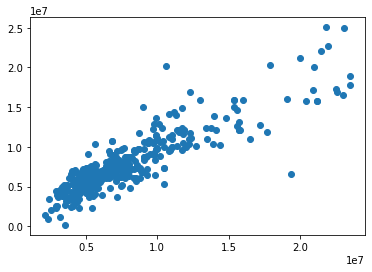

In [59]:
plt.scatter(y_test, predictions)

(array([  1.,   1.,  16., 150., 212.,  41.,  12.,   1.,   0.,   1.]),
 array([-9580929.31, -7335119.08, -5089308.85, -2843498.62,  -597688.4 ,
         1648121.83,  3893932.06,  6139742.29,  8385552.51, 10631362.74,
        12877172.97]),
 <BarContainer object of 10 artists>)

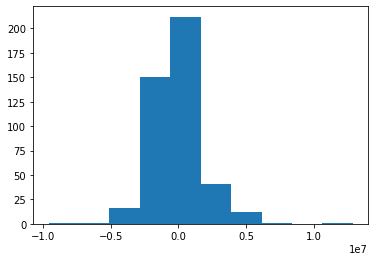

In [60]:
plt.hist(y_test - predictions)